In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn import preprocessing
import matplotlib.pyplot as mtpl

In [2]:
df = pd.read_csv('df.csv')

In [3]:
len(df)

301

In [4]:
df.head()

,Résident,Chambre,Etage,GIR,Protocole,Day Type,Semaine de l'année,Durée en Minutes,Mois,Année,Trimestre,Jour
0,3,70,1er,1,Entretien courant Avancé,Weekday,8,4.850933,2,2022,Trim 1,17
1,3,70,1er,1,Entretien courant Avancé,Weekday,3,9.375583,1,2022,Trim 1,12
2,3,70,1er,1,Entretien courant Avancé,Weekday,10,15.396083,3,2022,Trim 1,2
3,11,59,3ème,1,Entretien courant Avancé,Weekday,21,5.108050,5,2022,Trim 2,16
4,11,59,3ème,1,Entretien courant Avancé,Weekday,34,8.391583,8,2022,Trim 3,17


In [5]:
first_column = df.pop('Durée en Minutes')
df.insert(0, 'Durée en Minutes', first_column)

In [6]:
df.head()

,Durée en Minutes,Résident,Chambre,Etage,GIR,Protocole,Day Type,Semaine de l'année,Mois,Année,Trimestre,Jour
0,4.850933,3,70,1er,1,Entretien courant Avancé,Weekday,8,2,2022,Trim 1,17
1,9.375583,3,70,1er,1,Entretien courant Avancé,Weekday,3,1,2022,Trim 1,12
2,15.396083,3,70,1er,1,Entretien courant Avancé,Weekday,10,3,2022,Trim 1,2
3,5.108050,11,59,3ème,1,Entretien courant Avancé,Weekday,21,5,2022,Trim 2,16
4,8.391583,11,59,3ème,1,Entretien courant Avancé,Weekday,34,8,2022,Trim 3,17


In [7]:
label_encoder = preprocessing.LabelEncoder()
df['Etage']= label_encoder.fit_transform(df['Etage'])
df['Protocole']= label_encoder.fit_transform(df['Protocole'])
df['Day Type']= label_encoder.fit_transform(df['Day Type'])
df['Trimestre']= label_encoder.fit_transform(df['Trimestre'])
df.head()

,Durée en Minutes,Résident,Chambre,Etage,GIR,Protocole,Day Type,Semaine de l'année,Mois,Année,Trimestre,Jour
0,4.850933,3,70,1,1,1,0,8,2,2022,0,17
1,9.375583,3,70,1,1,1,0,3,1,2022,0,12
2,15.396083,3,70,1,1,1,0,10,3,2022,0,2
3,5.108050,11,59,3,1,1,0,21,5,2022,1,16
4,8.391583,11,59,3,1,1,0,34,8,2022,2,17


In [8]:
X = df.iloc[:,3:]
y = df.iloc[:,0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [11]:
lasso = Lasso(alpha = 1,fit_intercept=False,normalize=False)
print(lasso)

Lasso(alpha=1, fit_intercept=False, normalize=False)


In [12]:
lasso.fit(X_train, y_train)
print(lasso.coef_)
# le alpha = 1 semble convenir car nous n'avons pas tous les coeffecients à nulle. 

[ 0.         -0.00539946 -0.         -0.          0.          0.
 -0.         -0.          0.        ]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [13]:
preds = lasso.predict(X_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [25]:
print('R squared train set', round(lasso.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 2))




R squared train set -344.52
R squared test set -245.07


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [210, 91]

In [29]:
print('R squared train set', round(lasso.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso.score(X_test, y_test)))


R squared train set -344.52
R squared test set -2


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [28]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from sklearn.metrics import r2_score



# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lasso, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
print(r2_score(scores,preds))


Mean MAE: 3.787 (0.452)


ValueError: Found input variables with inconsistent numbers of samples: [30, 91]

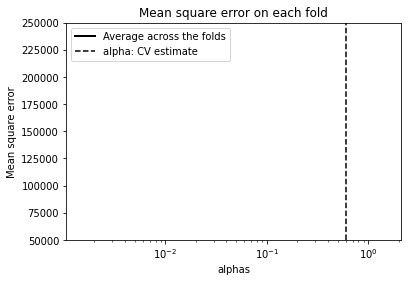

In [ ]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);

[0.5 0.  1.  1. ]
[0.00196078 0.70928131 0.92328911 1.        ]
[0.50392157 0.99998103 0.70492555 1.        ]
[1.         0.70054304 0.37841105 1.        ]
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]


IndexError: index 5 is out of bounds for axis 0 with size 5

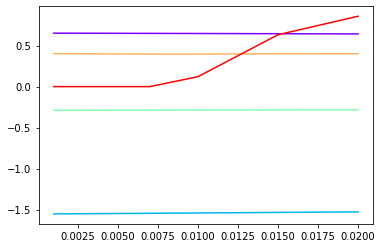

In [ ]:
# Nous regardons néanmoins le lasso path , c 'est à dire l 'évolution des coffecients en fonction de alpha. 
# 10 valeurs de alpha a essayer 
val_alpha = np.array([0.001,0.003,0.005,0.007,0.01,0.015,0.02])

alpha_for_path, coefs_lasso, _ = lasso_path(X_train,y_train,alphas=val_alpha)
#print(coefs_lasso.shape) 

import matplotlib.cm as cm
couleurs = cm.rainbow(np.linspace(0,1,5))
#graphique lasso path ( une courbe par variable , nous avons 5 variables )
for i in range(coefs_lasso.shape[0]):
    mtpl.plot(alpha_for_path,coefs_lasso[i,:],c=couleurs[i])
    print(couleurs[i])
    
mtpl.xlabel('Alpha')
mtpl.ylabel('Coefficients')
mtpl.title('Lasso path')
mtpl.show()

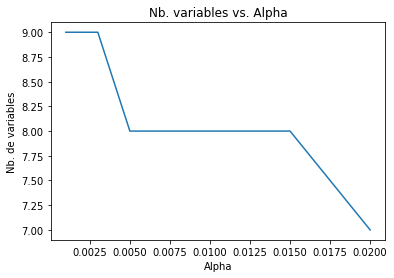

In [ ]:
nbNonZero = np.apply_along_axis(func1d=np.count_nonzero,arr=coefs_lasso,axis=0)
plt.plot(alpha_for_path,nbNonZero) 
plt.xlabel('Alpha') 
plt.ylabel('Nb. de variables') 
plt.title('Nb. variables vs. Alpha') 
plt.show()

: 